# ANOVA and Non-Parametric Tests

**Estimated Time**: 30 Minutes <br>
**Developer**: James Geronimo

## Table of Contents

1. Introduction <br>
    1.1. Learning Objectives <br>
    1.2. Understanding ANOVA <br>
    1.3. Setup
2. Data Preparation <br>
3. Visualizing the Data <br>
4. Performing ANOVA <br>
5. Sanity Check using SciPy <br>
6. Non-Parametric Test: Sign Test for Matched Pairs <br>
7. Conclusion

---

## 1. Introduction

### 1.1. Learning Objectives

Understanding how to compare multiple groups statistically is crucial in data analysis. We will learn to apply **ANOVA** and **non-parametric tests** to analyze housing prices. In this notebook, you will:
- Understand when it is appropriate to use ANOVA
- Learn how to manually compute ANOVA step-by-step
- Use SciPy’s `stats.f_oneway` as a sanity check
- Visualize housing price differences across different groups

### 1.2. Understanding ANOVA

What is the motivation for using **An**alysis **O**f **Va**riance, a.k.a. **ANOVA**, over a traditional Two-Mean Test? ANOVA is used when comparing **more than two groups**. More specfically, when comparing multiple groups, a series of two-sample t-tests is inefficient and increases the risk of Type I errors (false positives). ANOVA allows us to compare **more than two groups** in a single test. ANOVA checks whether the means of different groups are significantly different by comparing within-group and between-group variability.

We will explore **comparing house prices across different neighborhoods** in our dataset. In order to run an ANOVA test in the first place, there are three assumptions that need to be made:

1. **Normality:** The populations follow a normal distribution.
2. **Homogeneity of Variance:** Variances across groups are equal.
3. **Independence:** Observations are independent of each other.

For the sake of this module, we will assume that these three assumptions are true.

### 1.3. Setup

Below, we have imported some Python libraries that are necessary for this module. Make sure to run this cell before running any other code cells!

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

from ipywidgets import interact, widgets

---

## 2. Data Preparation

Let's first load our data in a `DataFrame` object named `ames`. We do this by using the `read_csv` function from the `pandas` library. We then use `head(10)` to see the first 10 rows of the data. In other words, we view the "head" of the data. Additionally, we print the `columns` variable to see all the features present in our dataset.

In [7]:
# Load the dataset and print the columns
ames = pd.read_csv("AmesHousing.csv")
display(ames.head(10))
print(ames.columns)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

Wow, that's a lot of columns to work with! While there are cool features like `"Garage Finish"` and `"Wood Deck SF"`, our analysis is primarily focused on understanding how house prices vary by neighborhood. Thus, we are only interested in two columns, namely, `"Neighborhood"` and `"SalePrice"`, so let's go ahead and index into these two columns and update our `ames` `DataFrame`. We will also print the shape of this filtered `DataFrame` to get a better idea of the data we are working with.

In [9]:
# Select relevant columns
ames = ames[["Neighborhood", "SalePrice"]]
display(ames.head(10))
print(ames.shape)

,Neighborhood,SalePrice
0,NAmes,215000
1,NAmes,105000
2,NAmes,172000
3,NAmes,244000
4,Gilbert,189900
5,Gilbert,195500
6,StoneBr,213500
7,StoneBr,191500
8,StoneBr,236500
9,Gilbert,189000


(2930, 2)


We now need to ensure that our analysis focuses on neighborhoods with a sufficient number of observations. If a neighborhood has too few sales recorded, it may introduce statistical noise or lead to unreliable conclusions.

We start by calculating how many times each neighborhood appears in our dataset using the `value_counts` function. This provides a count of sales transactions per neighborhood. Next, we define a threshold to filter out neighborhoods with very few observations. In this case, we keep only neighborhoods with more than 50 recorded sales. This step helps ensure that our statistical tests have adequate sample sizes for meaningful comparisons. Finally, we update our `ames` DataFrame to retain only the neighborhoods that meet our threshold using `.isin(selected_neighborhoods)` to filter rows where the `"Neighborhood"` column matches one of the selected values.

In [10]:
# Filter neighborhoods with enough data
neighborhood_counts = ames["Neighborhood"].value_counts()
selected_neighborhoods = neighborhood_counts[neighborhood_counts > 50].index
ames = ames[ames["Neighborhood"].isin(selected_neighborhoods)]
ames

,Neighborhood,SalePrice
0,NAmes,215000
1,NAmes,105000
2,NAmes,172000
3,NAmes,244000
4,Gilbert,189900
...,...,...
2925,Mitchel,142500
2926,Mitchel,131000
2927,Mitchel,132000
2928,Mitchel,170000


---

## 3. Visualizing the Data

### 3.1. Box Plots 

Before conducting statistical tests, it’s important to explore the data visually. This helps us understand the distribution of house prices across neighborhoods and check for variability between groups. Generating box plots are a great way to summarize key aspects of the data, such as median prices, interquartile ranges (IQR), and potential outliers in each neighborhood.

In the code cell below, we create the box plots using the following tools:
- `figure` initializes a new figure with a set size (in inches) to ensure that our visualization is large enough.
- `boxplot` helps us compare house prices across multiple neighborhoods.
- `xticks` simply rotates our x-axis labels by 45 degrees.
- `title` sets the title of our plot accordingly.
- `show` displays the plot.

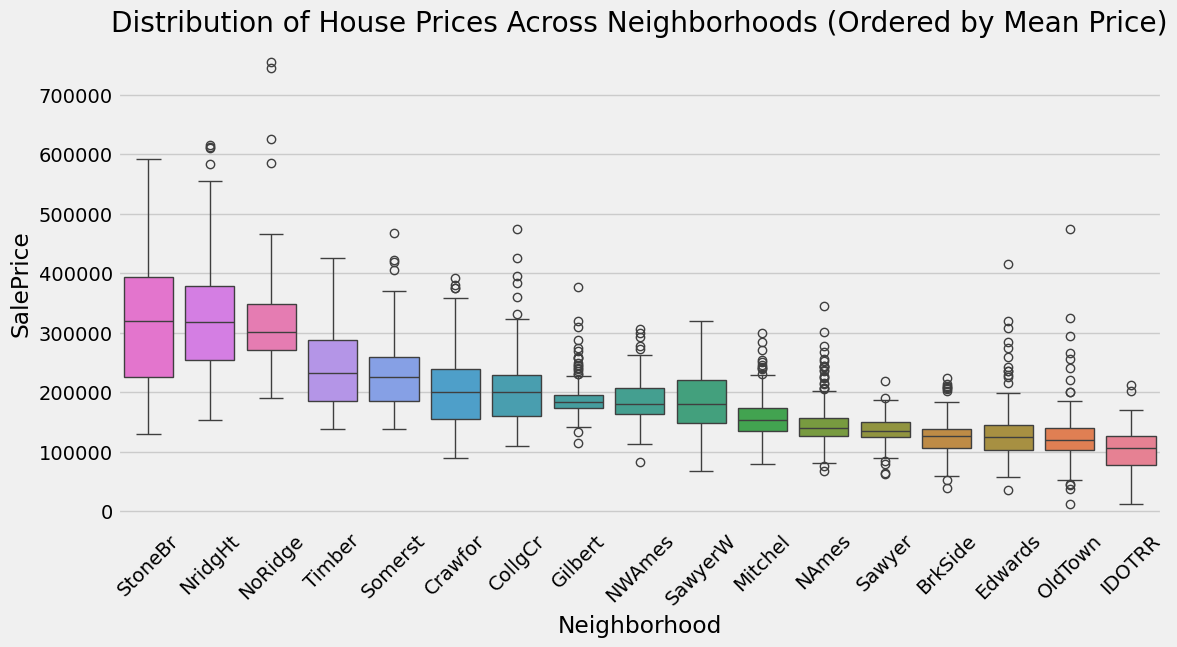

In [28]:
# Manually computing the median sale price for each neighborhood for ordering purposes
neighborhood_medians = ames.groupby("Neighborhood", observed=True)["SalePrice"].median().sort_values(ascending=False)
ames["Neighborhood"] = pd.Categorical(ames["Neighborhood"], categories=neighborhood_medians.index, ordered=True)

# Plot with the ordered x-axis
plt.figure(figsize=(12, 6))
sns.boxplot(data=ames, x="Neighborhood", y="SalePrice", hue="Neighborhood", order=neighborhood_medians.index)
plt.xticks(rotation=45)
plt.title("Box Plots of Sale Prices Across Neighborhoods")
plt.show()

### 3.2. Violin Plots

As previously noted, visual exploration is key to understanding whatever data is being analyzed. A violin plot is a great alternative to a box plot, as it provides additional insights into the shape of the data distribution. Unlike box plots, violin plots reveal more about the distribution shape and density of sale prices, making them useful for spotting multimodal distributions.

We use similar code to 3.1. to generate our plot, this time using `violinplot`.

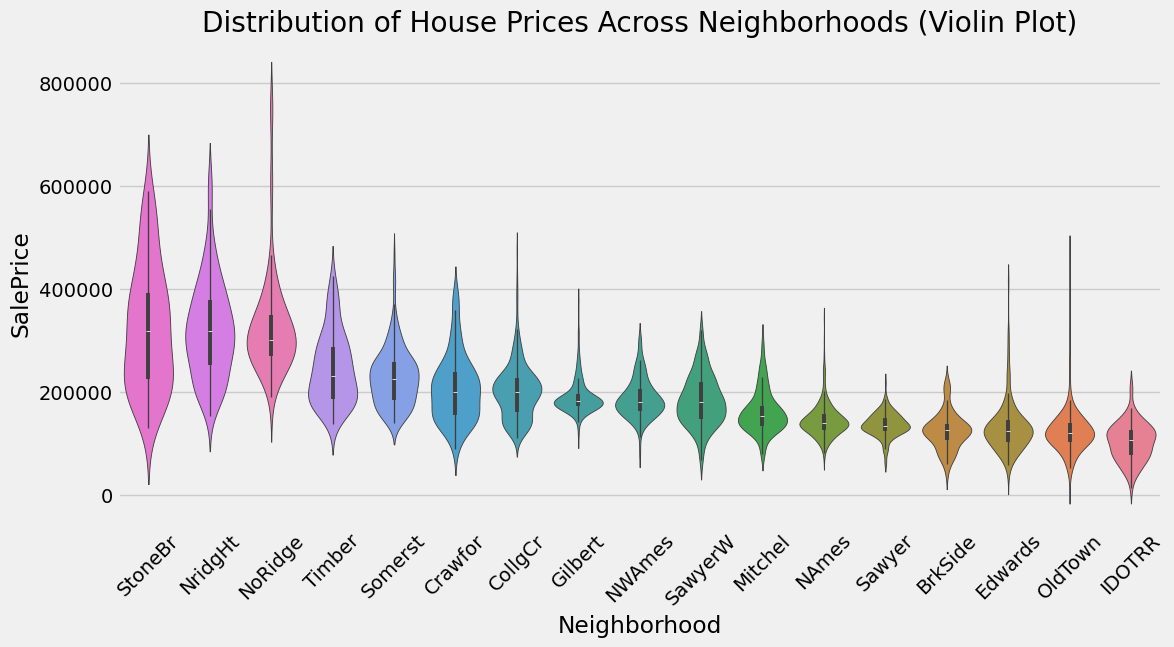

In [30]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=ames, x="Neighborhood", y="SalePrice", hue="Neighborhood", order=neighborhood_medians.index)
plt.xticks(rotation=45)
plt.title("Violin Plots of Sale Prices Across Neighborhoods")
plt.show()

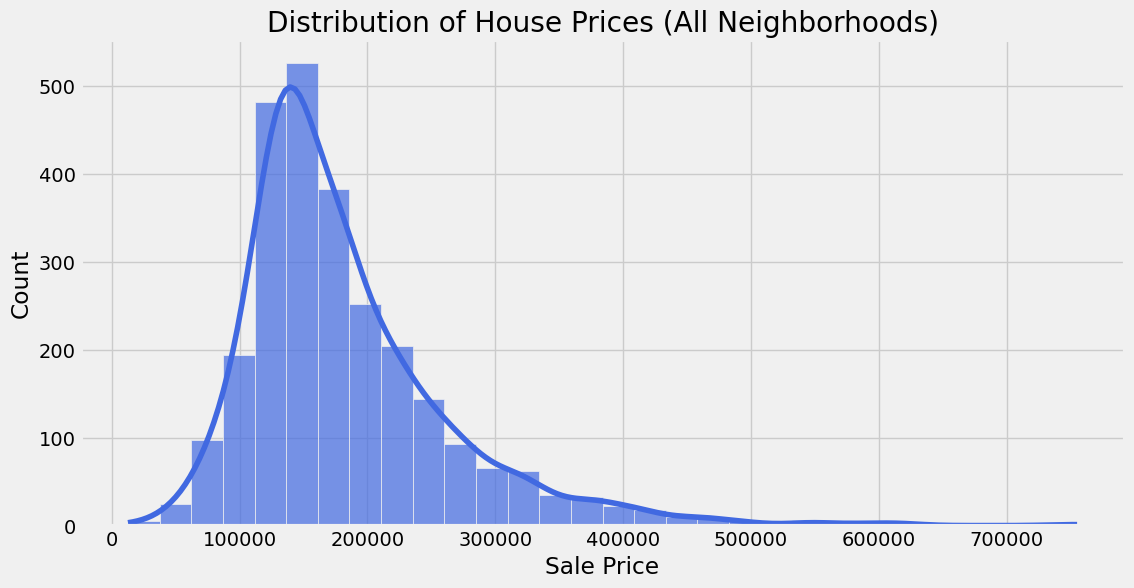

In [32]:
plt.figure(figsize=(12, 6))

# Create a histogram
sns.histplot(ames["SalePrice"], bins=30, kde=True, color="royalblue", alpha=0.7)

# Labels and title
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.title("Distribution of House Prices (All Neighborhoods)")

plt.show()


### Thought Provoking Question

---

## 4. Performing ANOVA

Having cleaned and visualized the data, it is time to perform ANOVA! For this exercise, we will manually compute ANOVA in order to gain a deeper understanding of its components, in contrast to using a built-in function. There are 7 steps we want to follow:
1. Computing the mean sale prices for each neighborhood and the overall mean of sale prices
2. Computing the sum of squares between, or SSB
3. Computing the sum of squares within, or SSW
4. Computing the degrees of freedom
5. Computing the mean squares between (MSB) and mean squares within (MSW)
6. Computing the F-Statistic
7. Computing the p-value

In [6]:
# Step 1: Compute Group Means and Overall Mean
group_means = ames.groupby("Neighborhood")["SalePrice"].mean()
overall_mean = ames["SalePrice"].mean()

group_means[:3],  overall_mean

(Neighborhood
 BrkSide    124756.250000
 CollgCr    201803.434457
 Crawfor    207550.834951
 Name: SalePrice, dtype: float64,
 np.float64(182793.66504672897))

In [7]:
# Step 2: Compute Between-Group Sum of Squares (SSB)
ssb = sum(ames.groupby("Neighborhood").size() * (group_means - overall_mean) ** 2)
ssb

9943483891966.018

In [8]:
# Step 3: Compute Within-Group Sum of Squares (SSW)
ssw = sum(sum((ames[ames["Neighborhood"] == group]["SalePrice"] - group_mean) ** 2)
          for group, group_mean in group_means.items())
ssw

7659972689149.87

In [9]:
# Step 4: Compute Degrees of Freedom
ames_between = len(group_means) - 1
ames_within = len(ames) - len(group_means)

print(f"{ames_between} {ames_within}")

16 2658


In [10]:
# Step 5: Compute Mean Squares
msb = ssb / ames_between
msw = ssw / ames_within

print(f"MSB: {msb}, MSW: {msw}")

MSB: 621467743247.8761, MSW: 2881855789.747882


In [11]:
# Step 6: Compute F-Statistic
f_statistic = msb / msw
f_statistic

215.6484531456187

In [12]:
# Step 7: Find p-value
p_value = 1 - stats.f.cdf(f_statistic, ames_between, ames_within)
p_value

np.float64(1.1102230246251565e-16)

---

## 5. Sanity Check Using SciPy

Now that we have computed the F-statistic and p-value for ANOVA manually, let us use a pre-packaged function from `SciPy` called `f_oneway` to sanity check our results. 

Before we can instantly plug our data into `f_oneway`, there are a few steps we need to take to set up our input correctly. First, we initialize an empty list called `price_groups` to store sale prices per neighborhood. Next, we loop through `selected_neighborhoods`, filter the data to each neighborhood, and extract the sale prices for each one. Then, these extracted values are appended to `price_groups`, ultimately creating a list of `pd.Series`. Finally, we pass this list into `f_oneway`, using the unpacking operator `*` to so it inputs each `pd.Series` as a separate argument.

In [13]:
# Prepare SalePrice data for each neighborhood
price_groups = []
for neighborhood in selected_neighborhoods:
    ames_neighborhood = ames[ames["Neighborhood"] == neighborhood]
    price_group = ames_neighborhood["SalePrice"]
    price_groups.append(price_group)

# Run the One-Way ANOVA test
anova_result = stats.f_oneway(*price_groups)

print(f"Sanity Check - SciPy F-statistic: {anova_result.statistic:.2f}, p-value: {anova_result.pvalue:.5f}")

Sanity Check - SciPy F-statistic: 215.65, p-value: 0.00000


---

## 6. Non-Parametric Test: Sign Test for Matched Pairs

Now that we have explored ANOVA... **TODO**

In [14]:
# TODO

---

## 7. Conclusion

Given our p-values in both cases were under 0.05, we reject the null hypothesis. This indicates significant price differences between neighborhoods. 

Note, however, that we should have more rigorously proved the ANOVA assumptions to be true at the start of the notebook, though this was abstracted away for the sake of this notebook. We highly encourage you to try proving these checks on your own, and you may find some interesting results!

We encourage you to explore further with the groundwork laid out with this notebook. You can try running ANOVA on different features and explore more tests to determine what neighborhoods had more signficant differences in sale price against other neighborhoods.

---

**Woohoo! You have completed this notebook! 🚀**